In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
nr = pd.read_csv('train.csv')

In [8]:
nr.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [9]:
nr.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
nr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


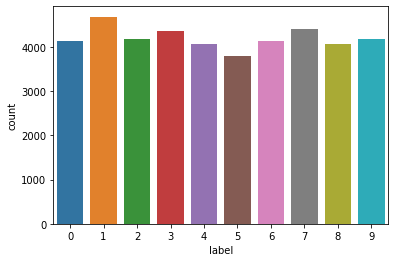

In [8]:
sns.countplot(x='label',data = nr)

In [10]:
d1 =  pd.get_dummies(nr['label'])

In [11]:
d1.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [12]:
nr = pd.concat([nr,d1],axis=1).drop('label',axis=1)

In [28]:
nr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 794 entries, pixel0 to 9
dtypes: int64(784), uint8(10)
memory usage: 251.6 MB


In [29]:
nr.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
X = nr.drop([0,1,2,3,4,5,6,7,8,9],axis = 1).values
y = nr[[0,1,2,3,4,5,6,7,8,9]].values

In [14]:
y.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
model = Sequential()

model.add(Dense(784,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(392,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(196,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy')


early_stop = EarlyStopping(monitor = 'loss',mode = 'min',verbose = 1,patience=5)

In [20]:
model = load_model('number_recognition.h5')

In [22]:
confirm = pd.read_csv('confirm.csv')

In [36]:
confirm = confirm.drop('Unnamed: 0',axis=1)

In [43]:
test = pd.read_csv('test.csv')

In [31]:
pred = model.predict_classes(X,verbose = 0)

In [39]:
pred_1 = model.predict_classes(confirm,verbose = 0)

In [40]:
pred_1

array([0], dtype=int64)

In [28]:
label = nr['label']

In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
print(confusion_matrix(label,pred))
print('\n')
print(classification_report(label,pred))

[[4130    0    0    0    0    0    0    0    1    1]
 [   2 4679    0    0    0    0    0    3    0    0]
 [   0    0 4176    0    0    0    0    1    0    0]
 [   0    0    0 4349    0    0    0    1    1    0]
 [   0    0    1    0 4058    0    4    2    0    7]
 [   1    0    0    3    0 3789    0    0    2    0]
 [   0    0    0    0    0    0 4137    0    0    0]
 [   0    0    2    0    0    0    0 4398    0    1]
 [   0    0    0    1    0    1    0    0 4061    0]
 [   1    0    0    2    1    0    0    1    3 4180]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      1.00      1.00      4684
           2       1.00      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       1.00      1.00      1.00      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       1.00      1.00 

In [18]:
from tensorflow.keras.models import load_model

In [86]:
model.save('number_recognition.h5')

In [80]:
test_pred = model.predict_classes(test)

In [87]:
results = pd.DataFrame(test_pred)

In [90]:
results.index +=1

In [93]:
results.to_csv('submission.csv')

In [2]:
nr.columns

NameError: name 'nr' is not defined